In [53]:
import numpy as np
from scipy.stats import norm
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from lib.option_formulas import price_by_BS

In [103]:
def get_spot(S0, sigma, T, r, N):
    S1 = np.full(N + 1, S0, dtype=float)
    S2 = np.full(N + 1, S0, dtype=float)
    S3 = np.full(N + 1, S0, dtype=float)
    S4 = np.full(N + 1, S0, dtype=float)


    t = np.linspace(0, T, N)
    
    dt = T / N

    Z = np.random.normal(size=N)
    plt.plot(Z*sigma*S4[0])
    plt.show()
    for n in range(N):
        S1[n + 1] = S1[n] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z[n])
        S2[n + 1] = S2[0] * np.exp((r - 0.5 * sigma ** 2) * t[n] + sigma * np.sqrt(t[n]) * Z[n])
        S3[n + 1] = S3[0] * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z[n])
        
        S4[n + 1] = S4[0] + r*S4[0]*t[n] + sigma*S4[0]*Z[n]*np.sqrt(t[n])

    return S1, S2, S3, S4

In [126]:
7*24*100

16800

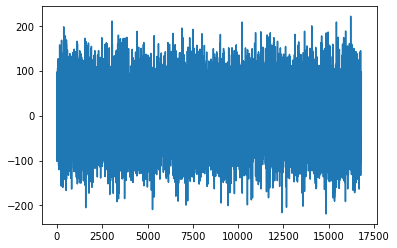

In [104]:
S1, S2, S3, S4 = get_spot(100, 0.6, 7/365, 0.05, 7*24*100)

(array([   4.,    5.,   23.,   75.,  181.,  512., 1248., 2702., 3091.,
         503.]),
 array([-7.15875447, -6.08802173, -5.017289  , -3.94655627, -2.87582353,
        -1.8050908 , -0.73435807,  0.33637466,  1.4071074 ,  2.47784013,
         3.54857286]),
 <a list of 10 Patch objects>)

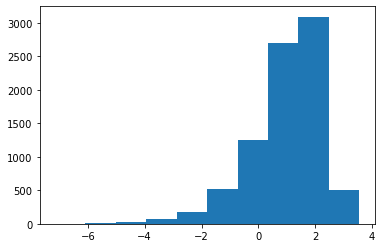

In [118]:
plt.hist(np.log(S2[2:]-S2[0]))

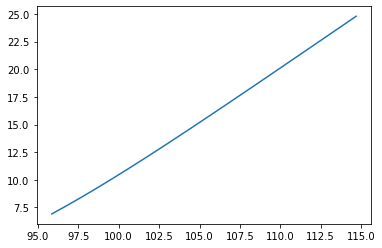

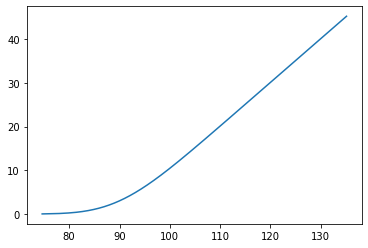

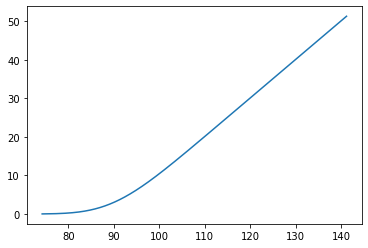

In [73]:
p1 = []
p2 = []
p3 = []

for s1, s2, s3 in zip(sorted(S1), sorted(S2), sorted(S3)):
    p1.append(price_by_BS(s1, 90, 7/365, 0.6, 'CALL', 0.05))    
    p2.append(price_by_BS(s2, 90, 7/365, 0.6, 'CALL', 0.05))
    p3.append(price_by_BS(s3, 90, 7/365, 0.6, 'CALL', 0.05))
    
plt.plot(sorted(S1), p1)
plt.show()

plt.plot(sorted(S2), p2)
plt.show()

plt.plot(sorted(S3), p3)
plt.show()

ShapiroResult(statistic=0.961829662322998, pvalue=0.0)


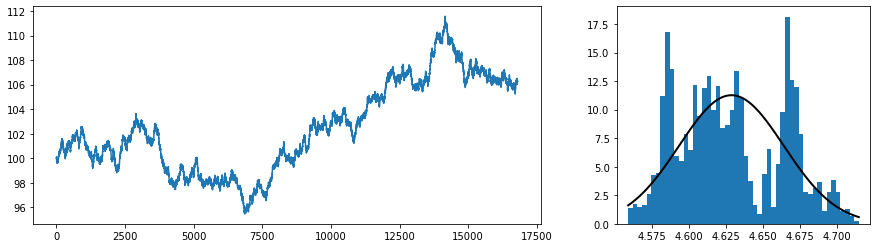

ShapiroResult(statistic=0.9906597137451172, pvalue=1.8214686985059326e-31)


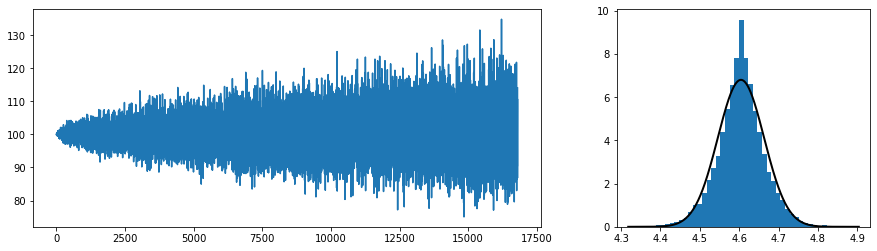

ShapiroResult(statistic=0.9998958706855774, pvalue=0.7208728194236755)


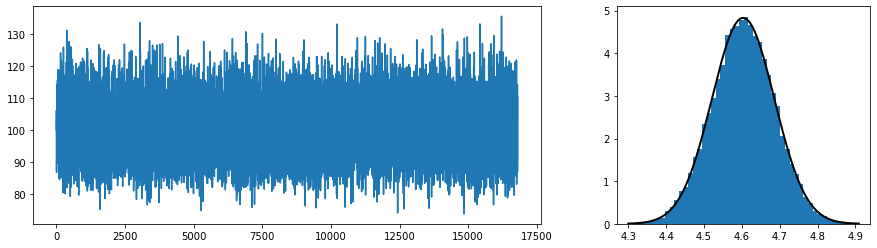

ShapiroResult(statistic=0.9869268536567688, pvalue=2.810828402457608e-36)


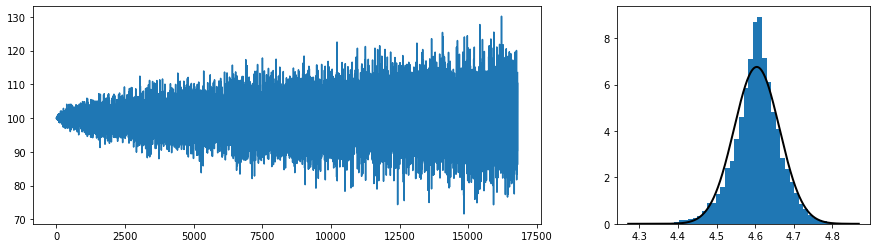












ShapiroResult(statistic=0.9999247789382935, pvalue=0.9290808439254761)


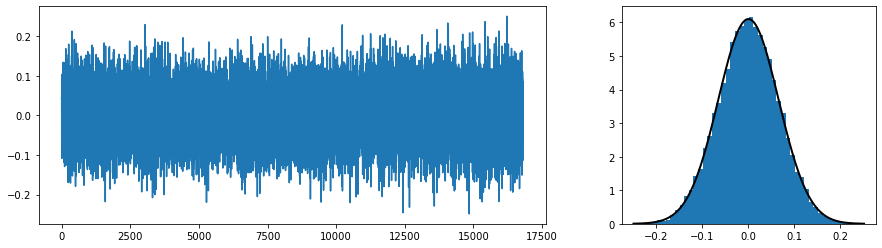

In [125]:
def plot_thing(S, log=True):
    fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]}, figsize=(15,4))

    axs[0].plot(S)
    
    if log:
        hist_data = np.log(S)
    else:
        hist_data = S
    axs[1].hist(hist_data, density=True, bins=50)

    x = np.linspace(min(hist_data), max(hist_data), 7*24*12)
    mu, std = norm.fit(hist_data) 
    p = norm.pdf(x, mu, std)
    
    print(shapiro(hist_data))

    axs[1].plot(x, p, 'k', linewidth=2)

    plt.show()
    
plot_thing(S1)
plot_thing(S2)
plot_thing(S3)
plot_thing(S4)
print('\n'*10)
plot_thing(S1[1:]-S1[:-1], False)